In [ ]:
from datetime import datetime, timedelta

import numpy as np
import pandas as pd

# Parameters for synthetic data generation
start_date = datetime(2025, 1, 16)
num_days = 252 * 2 # Typical number of trading days in a year
initial_close = 585.25

# Lists to hold generated data
dates = []
closes = []
volumes = []
opens = []
highs = []
lows = []

# Generate data
for i in range(num_days):
    date = start_date - timedelta(days=i)
    dates.append(date.strftime("%m/%d/%Y"))

    # Generate close price using Poisson distribution with Gaussian noise
    if i == 0:
        close_price = initial_close
    else:
        # Poisson distribution to simulate daily price changes
        price_change = np.random.poisson(lam=0) + np.random.normal(
            0, 2
        )  # Adjust lam and stddev as needed
        close_price += price_change

    closes.append(round(close_price, 2))

    # Generate other fields based on close price
    volume = np.random.randint(5000000, 15000000)  # Random volume between 5M and 15M
    open_price = round(
        close_price + np.random.normal(0, 1), 2
    )  # Open price close to the close price
    high_price = round(
        max(open_price, close_price) + np.random.uniform(0, 5), 2
    )  # High price slightly above close or open
    low_price = round(
        min(open_price, close_price) - np.random.uniform(0, 5), 2
    )  # Low price slightly below close or open

    volumes.append(volume)
    opens.append(open_price)
    highs.append(high_price)
    lows.append(low_price)

# Create DataFrame and save to CSV
data = {
    "Date": dates,
    "Close": closes,
    "Volume": volumes,
    "Open": opens,
    "High": highs,
    "Low": lows,
}

df = pd.DataFrame(data)
df.to_csv("synthetic_stock_data.csv", index=False)

print("Synthetic stock data generated and saved to 'synthetic_stock_data.csv'.")

Synthetic stock data generated and saved to 'synthetic_stock_data.csv'.


In [2]:
import pandas as pd
import numpy as np
import talib as ta


df = pd.read_csv("synthetic_stock_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    504 non-null    object 
 1   Close   504 non-null    float64
 2   Volume  504 non-null    int64  
 3   Open    504 non-null    float64
 4   High    504 non-null    float64
 5   Low     504 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 23.8+ KB


In [3]:
df.Date = pd.to_datetime(df.Date)
df.sort_values(by="Date", ascending=True, inplace=True)
df['sma9'] = ta.SMA(df['Close'].to_numpy(), 9)
df['sma21'] = ta.SMA(df['Close'].to_numpy(), 21)
df.head(10)

,Date,Close,Volume,Open,High,Low,sma9,sma21
503,2023-09-01,615.68,13302164,615.47,620.43,614.36,NaN,NaN
502,2023-09-02,613.83,11762342,613.64,617.94,611.39,NaN,NaN
501,2023-09-03,614.90,12973032,614.82,617.29,614.60,NaN,NaN
500,2023-09-04,614.63,14979527,613.42,614.92,609.90,NaN,NaN
499,2023-09-05,612.53,13205637,611.82,616.96,610.84,NaN,NaN
498,2023-09-06,609.12,5285517,609.58,613.05,606.64,NaN,NaN
497,2023-09-07,609.71,14367764,609.90,611.94,607.87,NaN,NaN
496,2023-09-08,609.00,6511901,608.63,613.15,607.77,NaN,NaN
495,2023-09-09,605.02,13252502,605.84,608.35,600.15,611.602222,NaN
494,2023-09-10,606.63,5994693,607.64,611.31,604.38,610.596667,NaN


In [4]:
import plotly.graph_objects as go

df["Date"] = pd.to_datetime(df.Date)

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'], high=df['High'],
                low=df['Low'], close=df['Close'])
                      ])

fig.update_layout(
    title=dict(text='Something'),
    yaxis=dict(
      title=dict(
        text='Some Coin'
        )
    ),
    shapes = [dict(
        x0='2023-09-01', x1='2023-09-01', y0=300, y1=1000, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2023-09-01', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='Increase Period Begins')],
    xaxis_rangeslider_visible=False
)

fig.show()

In [5]:
!pip install binance-connector


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [7]:
BINANCE_API_KEY="wVR8L0aSLXokmsWf0NauyOHI6iqkpxFZjhT2aIrNRNjy8E21RktANP6F2boLjfUB"
BINANCE_SECRET_KEY="9m8YabFlHqnLzUZIkCOb4NIgwJFLBi8mOyxeACcdm0evj7WUgrg3V681UeMQOAK0"

In [9]:
!pip install binance-connector

     ---------------------------------------- 0.0/74.4 kB ? eta -:--:--
     ---------- --------------------------- 20.5/74.4 kB 330.3 kB/s eta 0:00:01
     ---------- --------------------------- 20.5/74.4 kB 330.3 kB/s eta 0:00:01
     ---------- --------------------------- 20.5/74.4 kB 330.3 kB/s eta 0:00:01
     -------------------------- ----------- 51.2/74.4 kB 262.6 kB/s eta 0:00:01
     -------------------------- ----------- 51.2/74.4 kB 262.6 kB/s eta 0:00:01
     -------------------------- ----------- 51.2/74.4 kB 262.6 kB/s eta 0:00:01
     -------------------------- ----------- 51.2/74.4 kB 262.6 kB/s eta 0:00:01
     -------------------------------------- 74.4/74.4 kB 178.6 kB/s eta 0:00:00
     ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
     - -------------------------------------- 0.1/1.8 MB 651.6 kB/s eta 0:0

In [10]:
from binance.spot import Spot

def get_historical_klines(
    interval: str = "1m",
    limit: int = 30,
    symbol: str = "BTCUSDT",
) -> pd.DataFrame:
    # api key/secret are required for user data endpoints
    client = Spot(
        base_url="https://api2.binance.com", api_key=BINANCE_API_KEY, api_secret=BINANCE_SECRET_KEY
    )

    #  Get candlestick data for BNBUSDT at 1h interval
    klines = client.klines(symbol=symbol, interval=interval, limit=limit)

    # Convert to DataFrame and select OHLC columns
    df = pd.DataFrame(
        klines,
        columns=[
            'Timestamp',
             'Open',
             'High',
             'Low',
             'Close',
             'Volume',
             'Close_time',
             'Quote_asset_volume',
             'Number_of_trades',
             'Taker_buy_base_asset_volume',
             'Taker_buy_quote_asset_volume',
             'Ignore'
            ]
    )
    ohlc_df = df[['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume']].copy()

    # Convert timestamp from milliseconds to seconds
    ohlc_df["Timestamp"] = ohlc_df["Timestamp"].astype(float) // 1000

    # Convert OHLCV columns to float
    ohlc_df[['Open', 'High', 'Low', 'Close', 'Volume']] = ohlc_df[
        ['Open', 'High', 'Low', 'Close', 'Volume']
    ].astype("float64")

    return ohlc_df

In [11]:

df_orig = df

In [12]:
df.head()

,Date,Close,Volume,Open,High,Low,sma9,sma21
503,2023-09-01,567.62,5263235,567.97,571.25,564.84,NaN,NaN
502,2023-09-02,568.44,12243617,568.73,571.80,566.43,NaN,NaN
501,2023-09-03,567.79,11168580,568.39,570.98,565.24,NaN,NaN
500,2023-09-04,567.11,6205572,565.51,570.29,563.87,NaN,NaN
499,2023-09-05,566.48,12058144,567.84,569.95,565.11,NaN,NaN


In [16]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import talib as ta
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


# Load data
# df_orig = get_historical_klines(limit= 252 * 4, interval='1d')
df = df_orig.copy()

# df['Date'] = pd.to_datetime(df['Timestamp'], unit="s")
df.sort_values(by="Date", ascending=True, inplace=True)

# Calculate SMAs
df['sma100'] = ta.SMA(df['Close'].to_numpy(), timeperiod=100)

# Generate signals
df['Signal'] = 0  # Default no signal

df['Signal'][100:] = np.where(df['Close'][100:] > df['sma100'][100:], 1, 0)  # Buy signal when close > sma100
df['Signal'][100:] = np.where(df['Close'][100:] < df['sma100'][100:], -1, df['Signal'][100:])  # Sell signal when close < sma100

# Generate signals using .loc to avoid ChainedAssignmentError
# df.loc[100:, 'Signal'] = np.where(df['Close'][100:] > df['sma100'][100:], 1, 0)  # Buy signal when close > sma100
# df.loc[100:, 'Signal'] = np.where(df['Close'][100:] < df['sma100'][100:], -1, df.loc[100:, 'Signal'])  # Sell signal when close < sma100


# Create a list for annotations
annotations = []
for i in range(1, len(df)):
    if df['Signal'].iloc[i] == 1 and df['Signal'].iloc[i-1] != 1:
        annotations.append(dict(x=df['Date'].iloc[i], y=df['Close'].iloc[i],
                                 ax=0, ay=-10, xref='x', yref='y',
                                 showarrow=True, arrowhead=2,
                                 text='BUY', font=dict(color='purple')))
    elif df['Signal'].iloc[i] == -1 and df['Signal'].iloc[i-1] != -1:
        annotations.append(dict(x=df['Date'].iloc[i], y=df['Close'].iloc[i],
                                 ax=0, ay=10, xref='x', yref='y',
                                 showarrow=True, arrowhead=2,
                                 text='SELL', font=dict(color='blue')))

# Create the candlestick chart with SMAs
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                                      open=df['Open'], high=df['High'],
                                      low=df['Low'], close=df['Close'], name="Candles")],)

# Add SMAs to the figure
fig.add_trace(go.Scatter(x=df['Date'], y=df['sma100'], mode='lines', name='SMA 100', line=dict(color='orange', width=1)))

# Update layout with annotations and title
fig.update_layout(
    title=dict(text='BTC~USDT with Buy/Sell Signals'),
    yaxis=dict(title=dict(text='Price')),
    shapes=[dict(
        x0='2023-09-01', x1='2023-09-01', y0=300, y1=1000, xref='x', yref='paper',
        line_width=2)],
    annotations=annotations,
    xaxis_rangeslider_visible=False
)

# Show the figure
fig.show()


/tmp/ipykernel_102190/2112339763.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] == max(series[i-window:i+window+1]):
/tmp/ipykernel_102190/2112339763.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i] == min(series[i-window:i+window+1]):
/tmp/ipykernel_102190/2112339763.py:57: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if close[curr_idx] > close[prev_idx] and rsi[curr_idx] < rsi[prev_idx]:
/tmp/i

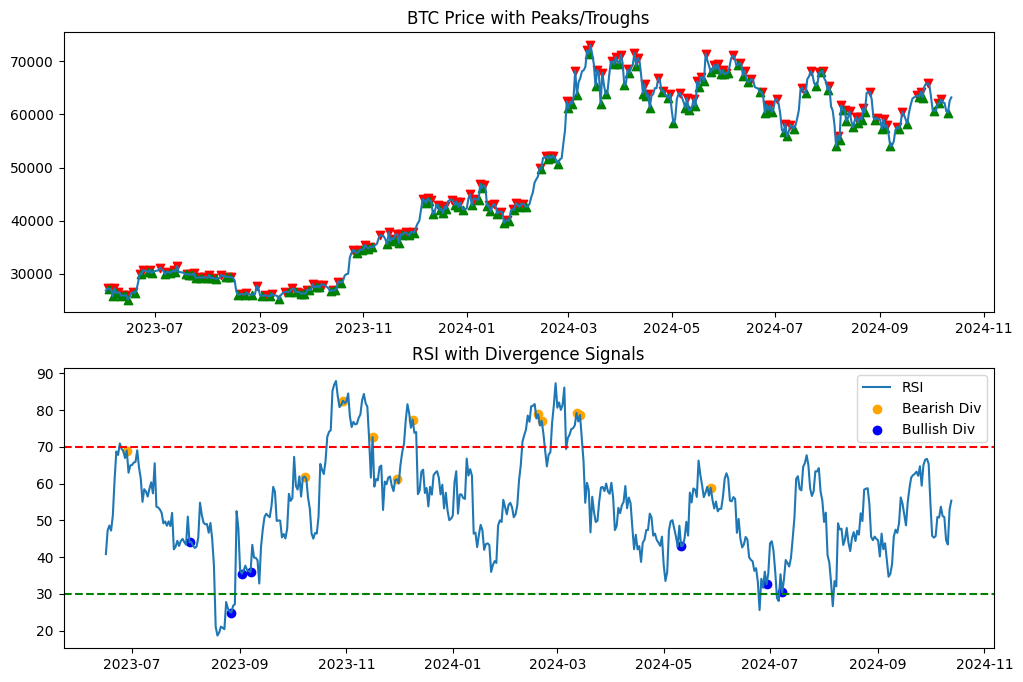

In [2]:
import pandas as pd
import talib
from binance.spot import Spot
import matplotlib.pyplot as plt

# Step 1: Fetch BTCUSDT data from Binance
client = Spot()
symbol = "BTCUSDT"
interval = "1d"  # Daily data
start_time = "2023-06-01"

# Convert start_time to timestamp (Binance uses milliseconds)
start_timestamp = int(pd.to_datetime(start_time).timestamp()) * 1000

# Get klines (price data)
klines = client.klines(symbol, interval, startTime=start_timestamp)
data = pd.DataFrame(klines, columns=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'])

# Convert columns to numeric and time to datetime
data['Close'] = pd.to_numeric(data['Close'])
data['Close time'] = pd.to_datetime(data['Close time'], unit='ms')

# Use 'Close time' as the index
close_prices = data.set_index('Close time')['Close']

# Step 2: Calculate RSI (same as before)
rsi = talib.RSI(close_prices, timeperiod=14)

# Step 3: Find peaks/troughs (same as before)
def find_peaks(series, window=1):
    peaks = []
    for i in range(window, len(series)-window):
        if series[i] == max(series[i-window:i+window+1]):
            peaks.append(i)
    return peaks

def find_troughs(series, window=1):
    troughs = []
    for i in range(window, len(series)-window):
        if series[i] == min(series[i-window:i+window+1]):
            troughs.append(i)
    return troughs

price_peaks = find_peaks(close_prices)
price_troughs = find_troughs(close_prices)

# Step 4: Detect Divergence (same as before)
def check_divergence(peaks_or_troughs, close, rsi, bullish=False):
    signals = []
    for i in range(1, len(peaks_or_troughs)):
        prev_idx = peaks_or_troughs[i-1]
        curr_idx = peaks_or_troughs[i]
        if bullish:
            if close[curr_idx] < close[prev_idx] and rsi[curr_idx] > rsi[prev_idx]:
                signals.append(curr_idx)
        else:
            if close[curr_idx] > close[prev_idx] and rsi[curr_idx] < rsi[prev_idx]:
                signals.append(curr_idx)
    return signals

bearish_signals = check_divergence(price_peaks, close_prices, rsi)
bullish_signals = check_divergence(price_troughs, close_prices, rsi, bullish=True)

# Step 5: Plot
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(close_prices, label='BTC Price')
plt.scatter(close_prices.index[price_peaks], close_prices.iloc[price_peaks], color='red', marker='v', label='Peaks')
plt.scatter(close_prices.index[price_troughs], close_prices.iloc[price_troughs], color='green', marker='^', label='Troughs')
plt.title('BTC Price with Peaks/Troughs')

plt.subplot(2, 1, 2)
plt.plot(rsi.index, rsi, label='RSI')
plt.axhline(70, linestyle='--', color='red')
plt.axhline(30, linestyle='--', color='green')
plt.scatter(rsi.index[bearish_signals], rsi.iloc[bearish_signals], color='orange', marker='o', label='Bearish Div')
plt.scatter(rsi.index[bullish_signals], rsi.iloc[bullish_signals], color='blue', marker='o', label='Bullish Div')
plt.title('RSI with Divergence Signals')
plt.legend()
plt.show()

# Additional Indicators

Let's Moving Forward with Stochastic RSI, MFI, and as bonus, a whole new kind of Indicators called TRIX

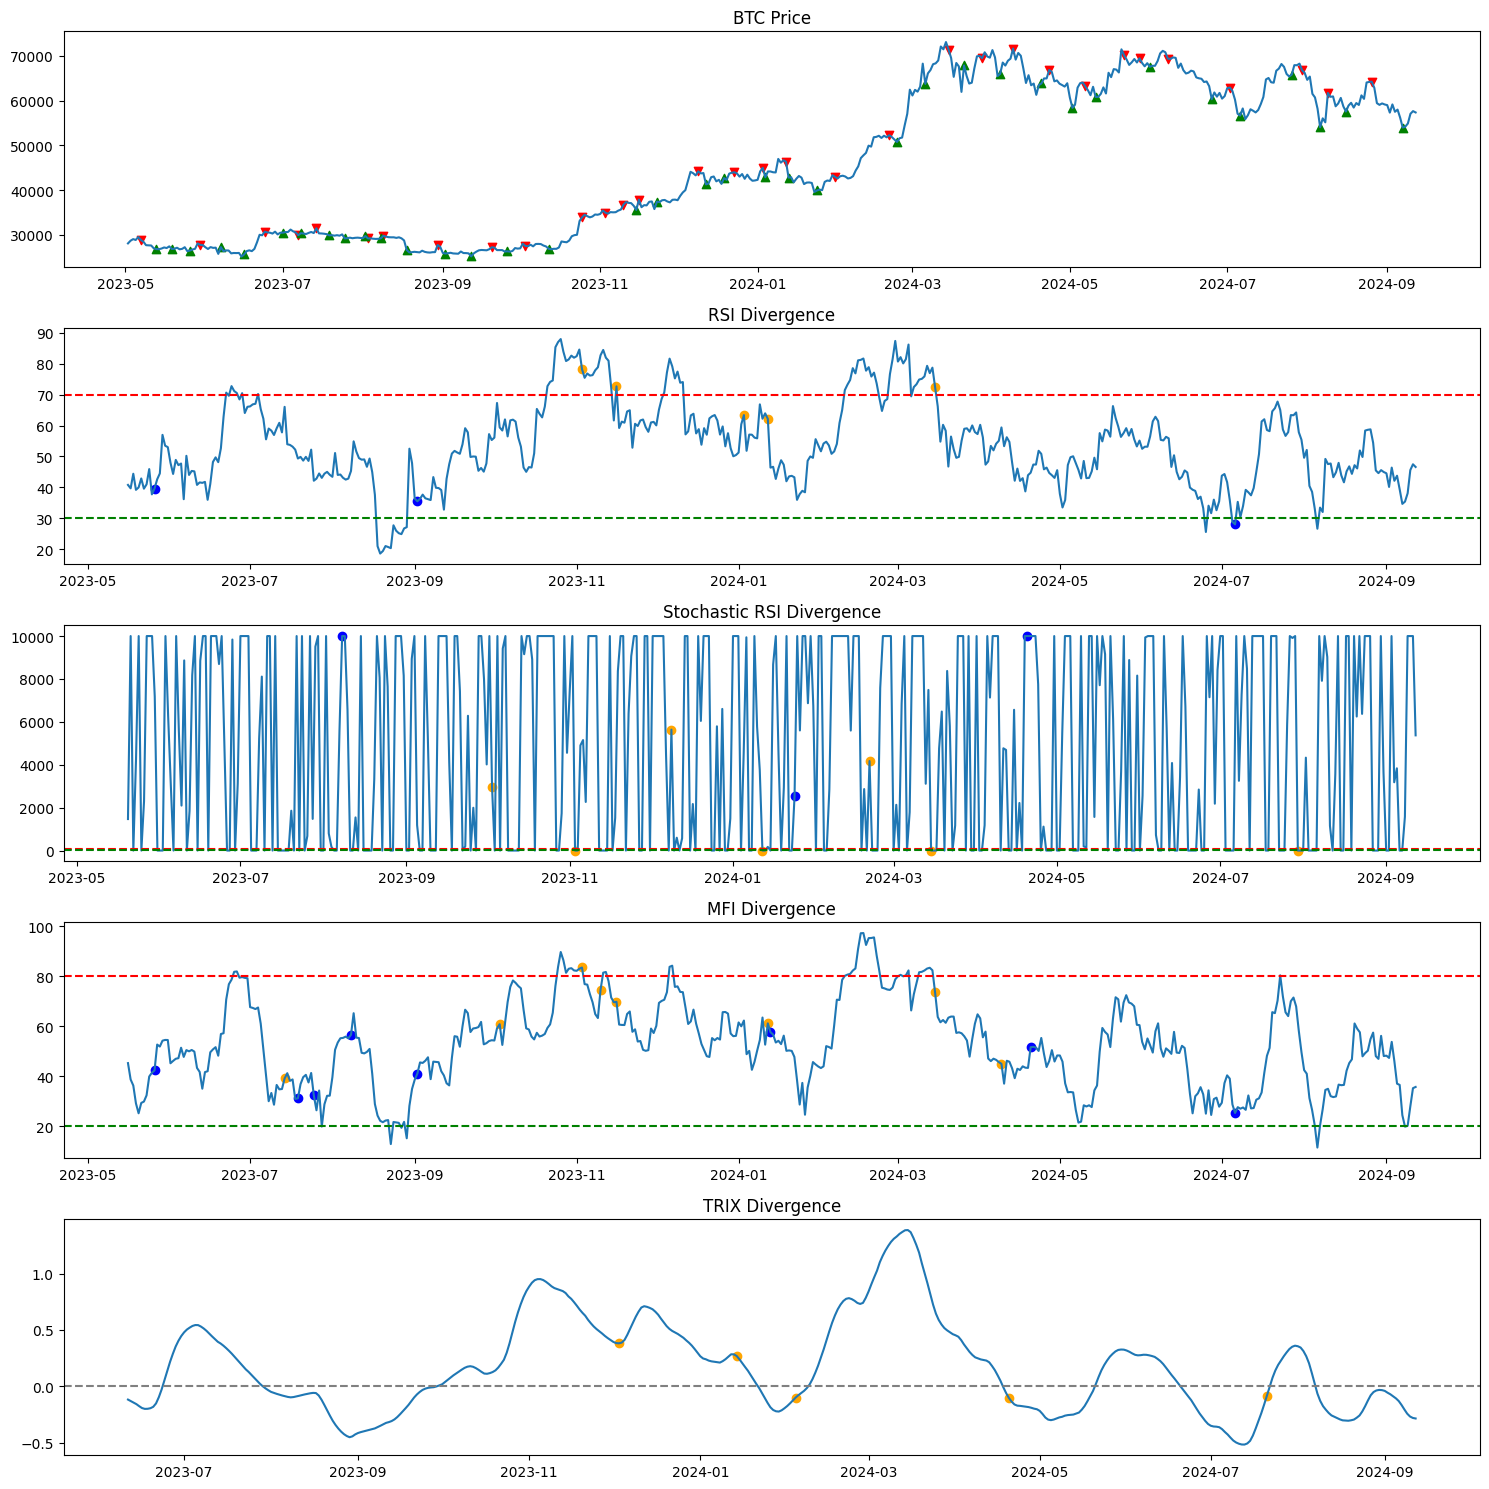

In [2]:
import pandas as pd
import talib
from binance.spot import Spot
import matplotlib.pyplot as plt

# Fetch BTCUSDT data (same as earlier)
client = Spot()
symbol = "BTCUSDT"
klines = client.klines(symbol, "1d", startTime=int(pd.to_datetime("2023-05-01").timestamp() * 1000))
data = pd.DataFrame(klines, columns=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote volume', 'Trades', 'Taker buy base', 'Taker buy quote', 'Ignore'])
data['Close'] = pd.to_numeric(data['Close'])
data['High'] = pd.to_numeric(data['High'])
data['Low'] = pd.to_numeric(data['Low'])
data['Volume'] = pd.to_numeric(data['Volume'])
close_prices = data.set_index(pd.to_datetime(data['Close time'], unit='ms'))['Close']
high_prices = data.set_index(pd.to_datetime(data['Close time'], unit='ms'))['High']
low_prices = data.set_index(pd.to_datetime(data['Close time'], unit='ms'))['Low']
volume = data.set_index(pd.to_datetime(data['Close time'], unit='ms'))['Volume']

# Calculate all indicators
# --------------------------
# RSI
rsi = talib.RSI(close_prices, timeperiod=14)
# Stochastic RSI
stoch_rsi = talib.STOCHRSI(close_prices, timeperiod=14, fastk_period=3, fastd_period=3)[0]  # Use Fastk only
# MFI
mfi = talib.MFI(high_prices, low_prices, close_prices, volume, timeperiod=14)
# TRIX
trix = talib.TRIX(close_prices, timeperiod=14)

# Function to find peaks/troughs (same as earlier)
def find_peaks(series, window=5):
    peaks = []
    for i in range(window, len(series)-window):
        if series.iloc[i] == max(series.iloc[i-window:i+window+1]):
            peaks.append(i)
    return peaks

def find_troughs(series, window=5):
    troughs = []
    for i in range(window, len(series)-window):
        if series.iloc[i] == min(series.iloc[i-window:i+window+1]):
            troughs.append(i)
    return troughs

# Function to check divergence (generic)
def check_divergence(price_series, indicator_series, peaks_or_troughs, bullish=False):
    signals = []
    for i in range(1, len(peaks_or_troughs)):
        prev_idx = peaks_or_troughs[i-1]
        curr_idx = peaks_or_troughs[i]
        # Compare price vs. indicator
        if bullish:
            # Price makes lower low, indicator makes higher low
            if (price_series.iloc[curr_idx] < price_series.iloc[prev_idx]) and (indicator_series.iloc[curr_idx] > indicator_series.iloc[prev_idx]):
                signals.append(curr_idx)
        else:
            # Price makes higher high, indicator makes lower high
            if (price_series.iloc[curr_idx] > price_series.iloc[prev_idx]) and (indicator_series.iloc[curr_idx] < indicator_series.iloc[prev_idx]):
                signals.append(curr_idx)
    return signals

# Detect divergences for all indicators
# -------------------------------------
# For RSI, StochRSI, MFI: Use peaks (bearish) and troughs (bullish)
price_peaks = find_peaks(high_prices, window=5)
price_troughs = find_troughs(low_prices, window=5)

# RSI Divergence
rsi_bearish = check_divergence(close_prices, rsi, price_peaks, bullish=False)
rsi_bullish = check_divergence(close_prices, rsi, price_troughs, bullish=True)

# StochRSI Divergence
stoch_rsi_bearish = check_divergence(close_prices, stoch_rsi, price_peaks, bullish=False)
stoch_rsi_bullish = check_divergence(close_prices, stoch_rsi, price_troughs, bullish=True)

# MFI Divergence
mfi_bearish = check_divergence(close_prices, mfi, price_peaks, bullish=False)
mfi_bullish = check_divergence(close_prices, mfi, price_troughs, bullish=True)

# TRIX Divergence (use peaks/troughs in TRIX itself)
trix_peaks = find_peaks(trix.dropna(), window=5)  # TRIX can have NaNs initially
trix_troughs = find_troughs(trix.dropna(), window=5)
trix_bearish = check_divergence(close_prices, trix, trix_peaks, bullish=False)
trix_bullish = check_divergence(close_prices, trix, trix_troughs, bullish=True)

# Plot all signals
# ----------------
fig, axs = plt.subplots(5, 1, figsize=(15, 15))

# Price
axs[0].plot(close_prices, label='Price')
axs[0].scatter(close_prices.index[price_peaks], close_prices.iloc[price_peaks], color='red', marker='v', label='Peaks')
axs[0].scatter(close_prices.index[price_troughs], close_prices.iloc[price_troughs], color='green', marker='^', label='Troughs')
axs[0].set_title('BTC Price')

# RSI
axs[1].plot(rsi, label='RSI')
axs[1].scatter(rsi.index[rsi_bearish], rsi.iloc[rsi_bearish], color='orange', marker='o', label='Bearish Div')
axs[1].scatter(rsi.index[rsi_bullish], rsi.iloc[rsi_bullish], color='blue', marker='o', label='Bullish Div')
axs[1].axhline(70, linestyle='--', color='red')
axs[1].axhline(30, linestyle='--', color='green')
axs[1].set_title('RSI Divergence')

# StochRSI
axs[2].plot(stoch_rsi * 100, label='StochRSI')  # Scale to 0-100
axs[2].scatter(stoch_rsi.index[stoch_rsi_bearish], stoch_rsi.iloc[stoch_rsi_bearish] * 100, color='orange', marker='o')
axs[2].scatter(stoch_rsi.index[stoch_rsi_bullish], stoch_rsi.iloc[stoch_rsi_bullish] * 100, color='blue', marker='o')
axs[2].axhline(80, linestyle='--', color='red')
axs[2].axhline(20, linestyle='--', color='green')
axs[2].set_title('Stochastic RSI Divergence')

# MFI
axs[3].plot(mfi, label='MFI')
axs[3].scatter(mfi.index[mfi_bearish], mfi.iloc[mfi_bearish], color='orange', marker='o')
axs[3].scatter(mfi.index[mfi_bullish], mfi.iloc[mfi_bullish], color='blue', marker='o')
axs[3].axhline(80, linestyle='--', color='red')
axs[3].axhline(20, linestyle='--', color='green')
axs[3].set_title('MFI Divergence')

# TRIX
axs[4].plot(trix, label='TRIX')
axs[4].scatter(trix.index[trix_bearish], trix.iloc[trix_bearish], color='orange', marker='o')
axs[4].scatter(trix.index[trix_bullish], trix.iloc[trix_bullish], color='blue', marker='o')
axs[4].axhline(0, linestyle='--', color='grey')
axs[4].set_title('TRIX Divergence')

plt.tight_layout()
plt.show()